# Delays por mes

<!--1. COMPLETAR QUE ARCHIVO CORRER PARA OBTENER LA MATRIZ DATA. El resultado esta en `smaller_data/OTP_por_mes.csv`-->
1. Correr tools `get_cant_vuelos.sh` y `get_delays_month.sh` para preprocesar y obtener todos los delays por mes y viajes.
2. Compilar el proyecto
3. Listar todos los datos preprocesados
4. CML!
5. Graficar y comparar
6. Calcular RMSE

In [38]:
# 1. correr local

In [39]:
# 2.
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 11.0.0.11000033
-- The CXX compiler identification is AppleClang 11.0.0.11000033
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp

In [40]:
!pwd

/Users/ilan/Code/tp3/notebooks


In [41]:
# 3. listando los datos
import numpy as np

import pandas as pd

# ESTAR PARADO EN ROOT PARA CORRER 
df = pd.read_csv('../smaller_data/OTP_por_mes.csv')

df_group = df.groupby(['YEAR'])

data_array = []

for symbol, group in df_group:
    year = []
    for index, row in group.iterrows():
        year.append(row.value)
    data_array.append(year)
    
data = np.matrix(data_array)

### 4. CML!

Vamos a empezar probando algunas cositas.

Primero hacemos CML en cada año por si mismo y calculo su NRMSE

$
RMSE(f) = \sqrt{\frac{1}{N}\sum_{i=0}^N e^2_{(i)}} \\
e(i) =y(i)−yˆ(i)
$

$NRMSE(f) = RMSE(f) / y_{max} - y_{min}$

Para empezar probamos con una cuadratica...

In [42]:
import predict
import math

def cuadratica(x):
    return np.array([1, x, x*x]);

cml = predict.CML(cuadratica, len(cuadratica(0)))

N = 12
x = np.arange(1, N+1)

x_axis = []
nrmses = []

coef = 0

for i in range(len(data)):
    x_axis.append(1994 + i)
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    coef = cml.coef()
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    nrmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    nrmse = rmse / (max(y) - min(y))
    
    nrmses.append(nrmse)
    
    
media_nrmse = sum(nrmses)/len(nrmses)

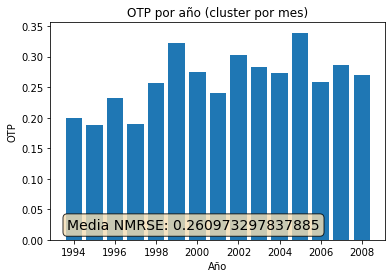

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
 
ax.bar(x_axis, nrmses)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.1, 'Media NMRSE: {0}'.format(media_nrmse), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel('Año')
plt.ylabel('OTP')
plt.title('OTP por año (cluster por mes)')

plt.show()

A ver como arpoxima cada año...

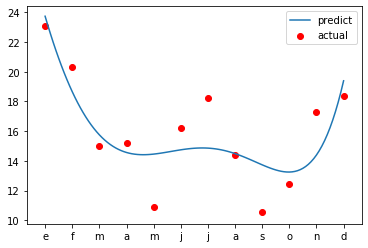

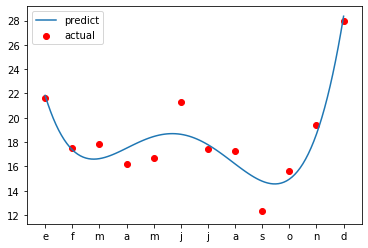

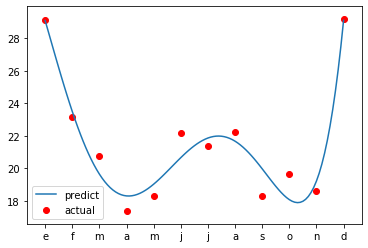

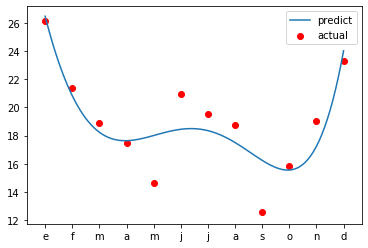

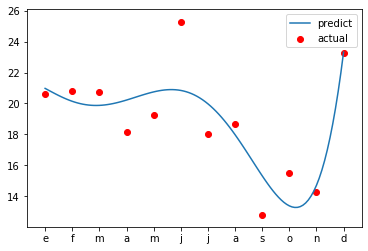

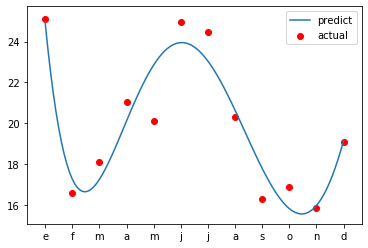

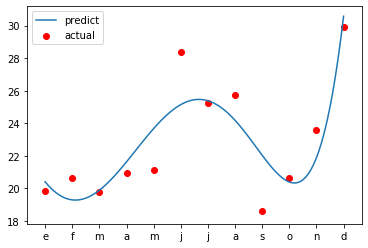

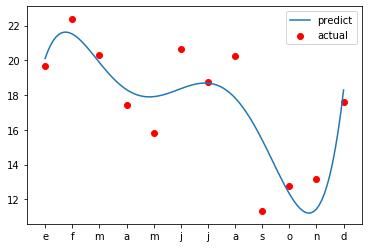

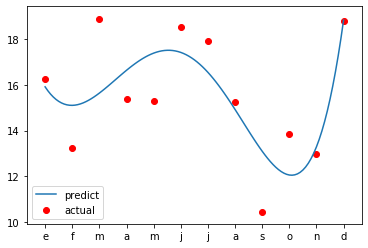

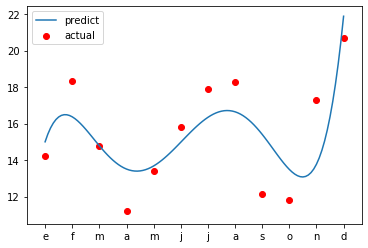

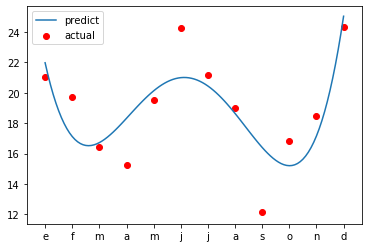

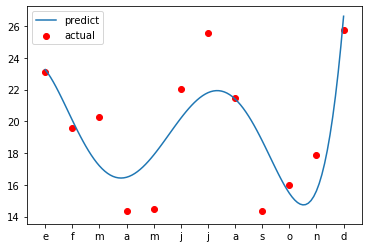

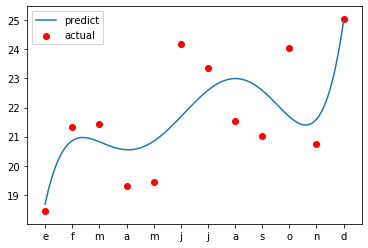

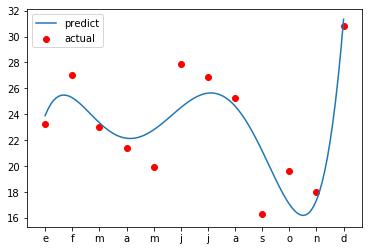

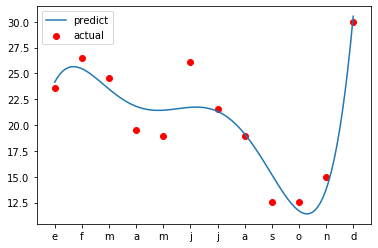

In [51]:
for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)
    cml.fit(x, y)

    f_x_axis = np.arange(1, 12.1, 0.1)
    f_y_axis = [cml.predict(x) for x in f_x_axis]
    x_ticks = np.arange(1, 13, 1)

    data_x_axis = np.arange(1, 13, 1)
    data_y_axis = y

    fig, ax = plt.subplots()
    ax.plot(f_x_axis, f_y_axis, label="predict")
    ax.scatter(data_x_axis, data_y_axis, label="actual", color="r")
    ax.legend()

    plt.xticks(x_ticks, ["e","f","m","a","m","j","j","a","s","o","n","d"])

    plt.show()

No parece aproximar tan bien...

En general, parece que hay dos minimos, uno en abril y uno en septiembre. También un máximo local en junio/julio
Probemos con una función de grado 5

In [65]:
import math

def F(x):
    return np.array([1, x, math.pow(x, 2), math.pow(x, 3), math.pow(x, 4), math.pow(x, 5)]);

cml = predict.CML(F, len(F(0)))

nrmses_2 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    nrmse = rmse / (max(y) - min(y))
    
    nrmses_2.append(nrmse)

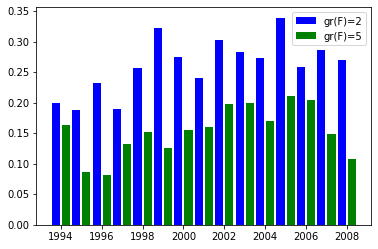

In [66]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.25, nrmses, color = 'b', width = 0.40)
p2 = plt.bar(X + 0.25, nrmses_2, color = 'g', width = 0.40)

plt.legend((p1[0], p2[0]), ('gr(F)=2', 'gr(F)=5'))

plt.show()

In [67]:
sum(nrmses_2)/len(nrmses_2)

0.15323678478105152

Un poco mejor no? :D

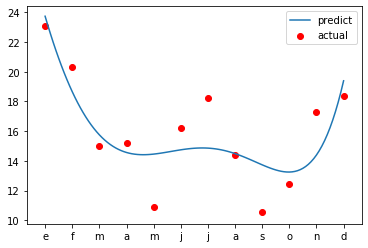

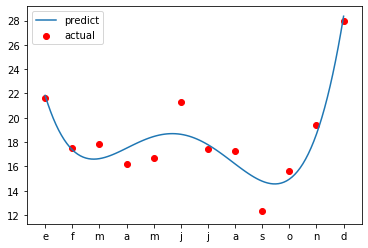

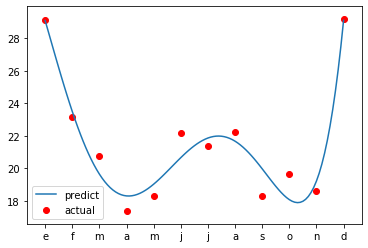

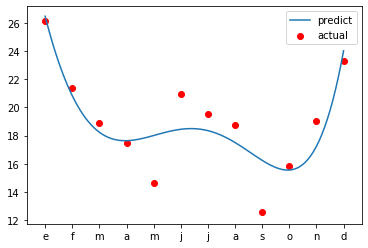

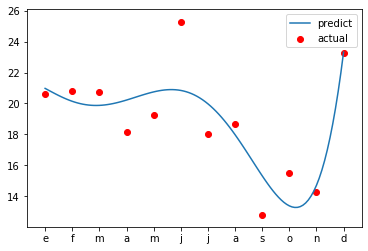

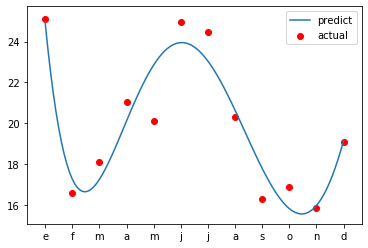

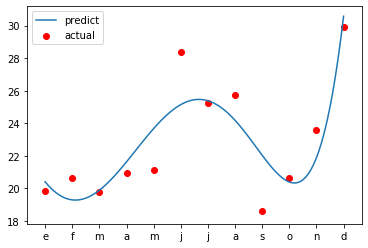

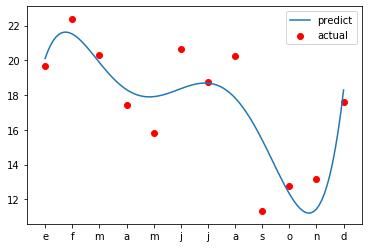

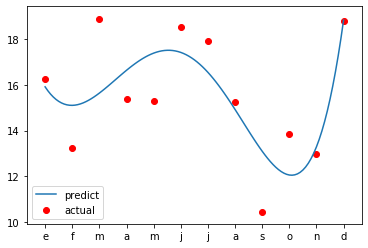

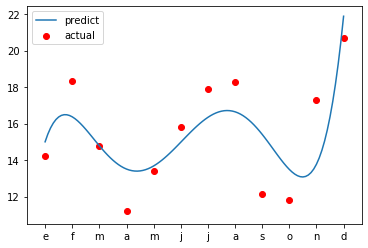

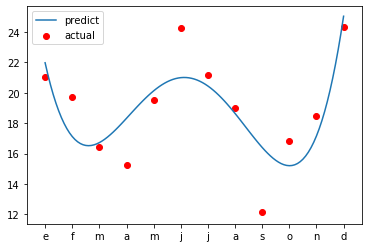

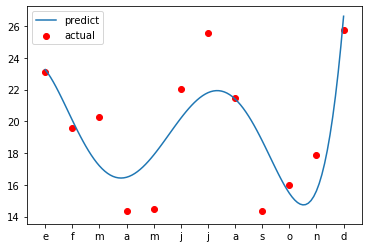

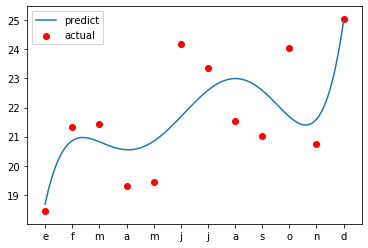

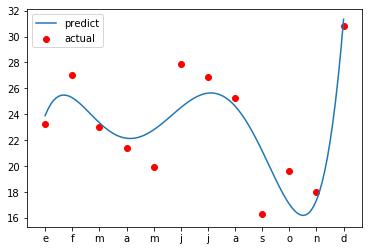

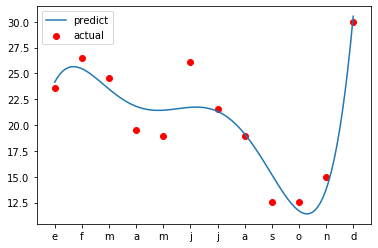

In [68]:
for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)
    cml.fit(x, y)

    f_x_axis = np.arange(1, 12.1, 0.1)
    f_y_axis = [cml.predict(x) for x in f_x_axis]
    x_ticks = np.arange(1, 13, 1)

    data_x_axis = np.arange(1, 13, 1)
    data_y_axis = y

    fig, ax = plt.subplots()
    ax.plot(f_x_axis, f_y_axis, label="predict")
    ax.scatter(data_x_axis, data_y_axis, label="actual", color="r")
    ax.legend()

    plt.xticks(x_ticks, ["e","f","m","a","m","j","j","a","s","o","n","d"])

    plt.show()

Bastaaaante mejor ...


In [69]:
cml.coef()

array([ 1.25208694e+01,  2.02254272e+01, -1.06964972e+01,  2.32523229e+00,
       -2.23579296e-01,  7.77129737e-03])

Tambien podriamos intentar aproximar con un ciclo...
Empecemos con `cos` y alguna función simple extra para darle mejor forma.

Lo vamos a comparar contra las otras dos a ver como vamos mejorando.

In [72]:
def F(x):
    return np.array([1, x, math.pow(x, 2), math.cos(x)]);

cml = predict.CML(F, len(F(0)))

nrmses_3 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    nrmse = rmse / (max(y) - min(y))
    
    nrmses_3.append(nrmse)

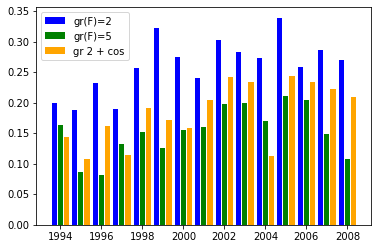

3.6514576686858526


In [73]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.30, nrmses, color = 'b', width = 0.25)
p2 = plt.bar(X, nrmses_2, color = 'g', width = 0.25)
p3 = plt.bar(X + 0.30, nrmses_3, color = 'orange', width = 0.25)

plt.legend((p1[0], p2[0], p3[0]), ('gr(F)=2', 'gr(F)=5', 'gr 2 + cos'))

plt.show()

print(rmse)

No mejoro...
Probemos con `cos` y la de grado 5...

In [82]:
def F(x):
    return np.array([1, x, math.pow(x, 2), math.pow(x, 3), math.pow(x, 4), math.pow(x, 5), math.cos(x)]);

cml = predict.CML(F, len(F(0)))

nrmses_4 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    nrmse = rmse / (max(y) - min(y))
    
    nrmses_4.append(nrmse)

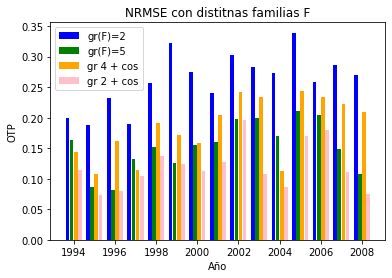

1.307551225640509


In [96]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.30, nrmses, color = 'b', width = 0.18)
p2 = plt.bar(X - 0.10, nrmses_2, color = 'g', width = 0.18)
p3 = plt.bar(X + 0.10, nrmses_3, color = 'orange', width = 0.18)
p4 = plt.bar(X + 0.30, nrmses_4, color = 'pink', width = 0.18)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('gr(F)=2', 'gr(F)=5', 'gr 4 + cos', 'gr 2 + cos'))
plt.title('NRMSE con distitnas familias F')
plt.xlabel('Año')
plt.ylabel('OTP')

plt.show()

print(rmse)

Es esta eh! Veamos como se comporta

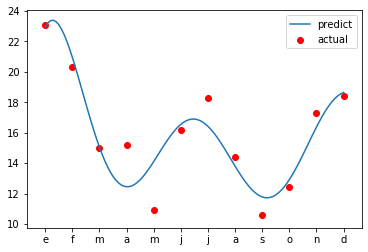

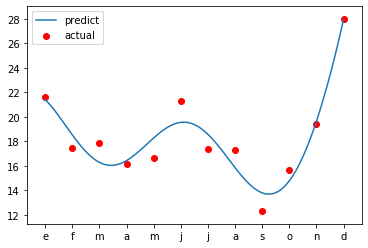

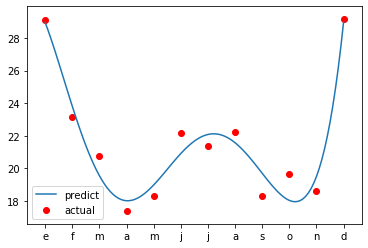

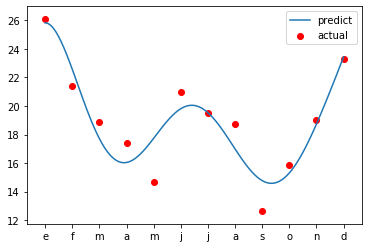

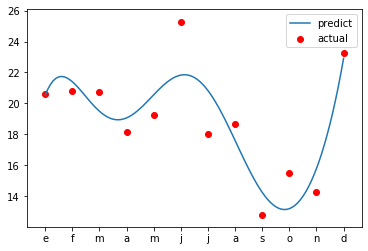

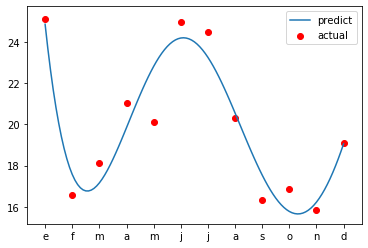

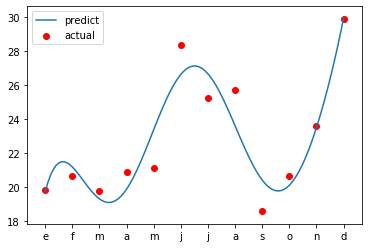

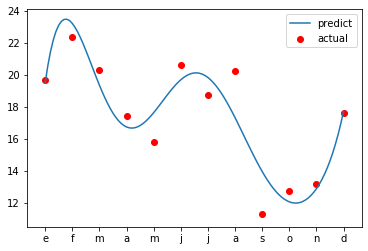

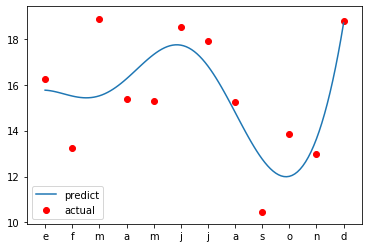

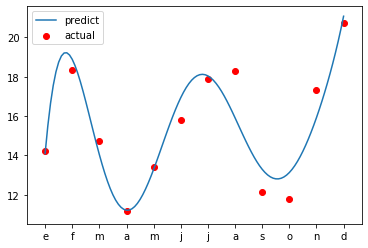

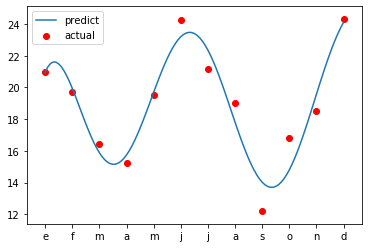

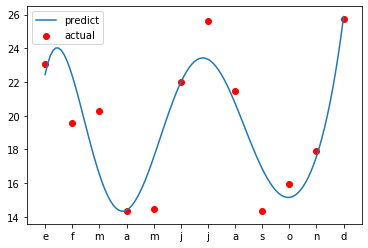

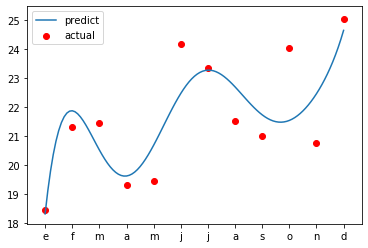

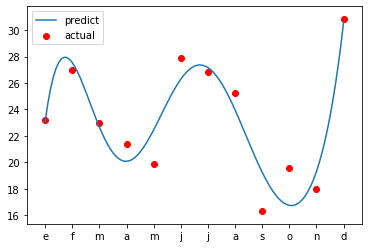

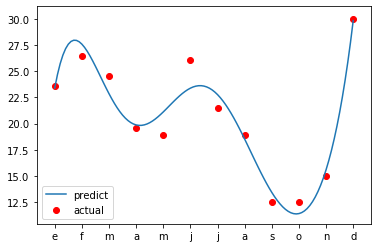

In [76]:
for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)
    cml.fit(x, y)

    f_x_axis = np.arange(1, 12.1, 0.1)
    f_y_axis = [cml.predict(x) for x in f_x_axis]
    x_ticks = np.arange(1, 13, 1)

    data_x_axis = np.arange(1, 13, 1)
    data_y_axis = y

    fig, ax = plt.subplots()
    ax.plot(f_x_axis, f_y_axis, label="predict")
    ax.scatter(data_x_axis, data_y_axis, label="actual", color="r")
    ax.legend()

    plt.xticks(x_ticks, ["e","f","m","a","m","j","j","a","s","o","n","d"])

    plt.show()

In [77]:
print(cml.coef())

[-1.22968280e+01  5.14432379e+01 -2.19789973e+01  3.97314483e+00
 -3.25227277e-01  9.90271291e-03  4.74997374e+00]
